In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import syft as sy
import time
from collections import OrderedDict

In [3]:
def average_weight(weight1 , weight2):
    result = [[[] for i in range(len(weight1[0]))] for j in range(len(weight1))]
    for i in range(len(weight1)):
        for j in range(len(weight1[0])):
            result[i][j] = (weight1[i][j] + weight2[i][j]) / 2
    return result

In [4]:
def average_bias(bias1 , bias2):
    result = [[] for i in range(len(bias1))]
    for i in range(len(bias1)):
        result[i] = (bias1[i] + bias2[i]) / 2
    return result

### Establish connection

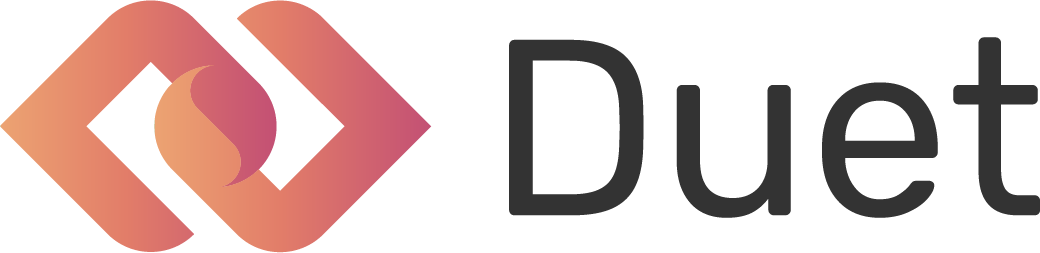

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [190]:
duet1 = sy.join_duet(loopback=True)

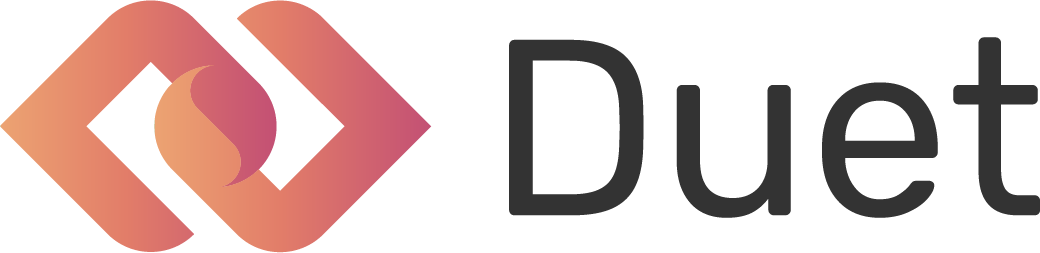

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [191]:
duet2 = sy.join_duet(loopback=True)

### Checkpoint 0

In [192]:
duet1.store.pandas

,ID,Tags,Description,object_type
0,<UID: bf96a2b484ce44ae8b14745da5fa53b2>,[fc1_weight],,<class 'syft.lib.python.list.List'>
1,<UID: f337a0fbc7e348d8973651e970b62546>,[fc1_bias],,<class 'syft.lib.python.list.List'>
2,<UID: a7ee7b1dfb2b4027b9efdd04efda327f>,[fc2_weight],,<class 'syft.lib.python.list.List'>
3,<UID: 2d075b9ccb37489b9b97a2c76fd17361>,[fc2_bias],,<class 'syft.lib.python.list.List'>
4,<UID: e97a1c03a86d4361b607cc92bcdcd689>,[fc3_weight],,<class 'syft.lib.python.list.List'>
5,<UID: 407d2eb41f564d67bf038bbf2cd4a2cc>,[fc3_bias],,<class 'syft.lib.python.list.List'>
6,<UID: 59eff51063a144f781bf39e83c6b0747>,[fc4_weight],,<class 'syft.lib.python.list.List'>
7,<UID: 590d0f7a93dc4c98a17a749f95d03f17>,[fc4_bias],,<class 'syft.lib.python.list.List'>


In [193]:
duet2.store.pandas

,ID,Tags,Description,object_type
0,<UID: 76ad7f6a16d94f7f92149cdcbc0da4db>,[fc1_weight],,<class 'syft.lib.python.list.List'>
1,<UID: 18b745928e484e6b892ed9bb7032dd23>,[fc1_bias],,<class 'syft.lib.python.list.List'>
2,<UID: 2901c5505001403f821ed1f4d8add13c>,[fc2_weight],,<class 'syft.lib.python.list.List'>
3,<UID: f44cdb8991e44c848ad7a090905f2944>,[fc2_bias],,<class 'syft.lib.python.list.List'>
4,<UID: 83fa59c131b2422ab47d697175cff39f>,[fc3_weight],,<class 'syft.lib.python.list.List'>
5,<UID: cfb58b89f8bc49f0b192300956fb0bf5>,[fc3_bias],,<class 'syft.lib.python.list.List'>
6,<UID: b0854809d7054442b57e693bad681735>,[fc4_weight],,<class 'syft.lib.python.list.List'>
7,<UID: 5ba6bedfc19b44d3b5876f18d9a66cd6>,[fc4_bias],,<class 'syft.lib.python.list.List'>


In [194]:
start = time.time()

duet1_fc1_weight_ptr = duet1.store["fc1_weight"]
duet1_fc1_bias_ptr = duet1.store["fc1_bias"]
duet1_fc2_weight_ptr = duet1.store["fc2_weight"]
duet1_fc2_bias_ptr = duet1.store["fc2_bias"]
duet1_fc3_weight_ptr = duet1.store["fc3_weight"]
duet1_fc3_bias_ptr = duet1.store["fc3_bias"]
duet1_fc4_weight_ptr = duet1.store["fc4_weight"]
duet1_fc4_bias_ptr = duet1.store["fc4_bias"]

end = time.time()
print(f"Take params pointers time: {float(end - start)} seconds")

Take params pointers time: 0.11697053909301758 seconds


In [195]:
start = time.time()

duet1_fc1_weight_ptr.request(reason="I would like to get the fc1 weight")
duet1_fc1_bias_ptr.request(reason="I would like to get the fc1 bias")
duet1_fc2_weight_ptr.request(reason="I would like to get the fc2 weight")
duet1_fc2_bias_ptr.request(reason="I would like to get the fc2 bias")
duet1_fc3_weight_ptr.request(reason="I would like to get the fc3 weight")
duet1_fc3_bias_ptr.request(reason="I would like to get the fc3 bias")
duet1_fc4_weight_ptr.request(reason="I would like to get the fc4 weight")
duet1_fc4_bias_ptr.request(reason="I would like to get the fc4 bias")

end = time.time()
print(f"Request params time: {float(end - start)} seconds")

Request params time: 0.8786840438842773 seconds


In [196]:
start = time.time()

duet2_fc1_weight_ptr = duet2.store["fc1_weight"]
duet2_fc1_bias_ptr = duet2.store["fc1_bias"]
duet2_fc2_weight_ptr = duet2.store["fc2_weight"]
duet2_fc2_bias_ptr = duet2.store["fc2_bias"]
duet2_fc3_weight_ptr = duet2.store["fc3_weight"]
duet2_fc3_bias_ptr = duet2.store["fc3_bias"]
duet2_fc4_weight_ptr = duet2.store["fc4_weight"]
duet2_fc4_bias_ptr = duet2.store["fc4_bias"]

end = time.time()
print(f"Take params pointers time: {float(end - start)} seconds")

Take params pointers time: 0.1220712661743164 seconds


In [197]:
start = time.time()

duet2_fc1_weight_ptr.request(reason="I would like to get the fc1 weight")
duet2_fc1_bias_ptr.request(reason="I would like to get the fc1 bias")
duet2_fc2_weight_ptr.request(reason="I would like to get the fc2 weight")
duet2_fc2_bias_ptr.request(reason="I would like to get the fc2 bias")
duet2_fc3_weight_ptr.request(reason="I would like to get the fc3 weight")
duet2_fc3_bias_ptr.request(reason="I would like to get the fc3 bias")
duet2_fc4_weight_ptr.request(reason="I would like to get the fc4 weight")
duet2_fc4_bias_ptr.request(reason="I would like to get the fc4 bias")

end = time.time()
print(f"Request params time: {float(end - start)} seconds")

Request params time: 0.8974990844726562 seconds


### Checkpoint 1

In [198]:
start = time.time()

duet1_fc1_weight = duet1_fc1_weight_ptr.get()
duet1_fc1_bias = duet1_fc1_bias_ptr.get()
duet1_fc2_weight = duet1_fc2_weight_ptr.get()
duet1_fc2_bias = duet1_fc2_bias_ptr.get()
duet1_fc3_weight = duet1_fc3_weight_ptr.get()
duet1_fc3_bias = duet1_fc3_bias_ptr.get()
duet1_fc4_weight = duet1_fc4_weight_ptr.get()
duet1_fc4_bias = duet1_fc4_bias_ptr.get()

end = time.time()
print(f"Get Owner 1 parameter time: {float(end - start)} seconds")

Get Owner 1 parameter time: 27.535746097564697 seconds


In [199]:
start = time.time()

duet2_fc1_weight = duet2_fc1_weight_ptr.get()
duet2_fc1_bias = duet2_fc1_bias_ptr.get()
duet2_fc2_weight = duet2_fc2_weight_ptr.get()
duet2_fc2_bias = duet2_fc2_bias_ptr.get()
duet2_fc3_weight = duet2_fc3_weight_ptr.get()
duet2_fc3_bias = duet2_fc3_bias_ptr.get()
duet2_fc4_weight = duet2_fc4_weight_ptr.get()
duet2_fc4_bias = duet2_fc4_bias_ptr.get()

end = time.time()
print(f"Get Owner 2 parameter time: {float(end - start)} seconds")

Get Owner 2 parameter time: 26.9712917804718 seconds


In [200]:
start = time.time()

global_fc1_weight = average_weight(duet1_fc1_weight, duet2_fc1_weight)
global_fc1_bias = average_bias(duet1_fc1_bias , duet2_fc1_bias)
global_fc2_weight = average_weight(duet1_fc2_weight, duet2_fc2_weight)
global_fc2_bias = average_bias(duet1_fc2_bias , duet2_fc2_bias)
global_fc3_weight = average_weight(duet1_fc3_weight, duet2_fc3_weight)
global_fc3_bias = average_bias(duet1_fc3_bias , duet2_fc3_bias)
global_fc4_weight = average_weight(duet1_fc4_weight, duet2_fc4_weight)
global_fc4_bias = average_bias(duet1_fc4_bias , duet2_fc4_bias)

end = time.time()
print(f"Average time: {float(end - start)} seconds")

Average time: 5.603806734085083 seconds


In [201]:
start = time.time()

sy.lib.python.List(global_fc1_weight).send(duet1, pointable=True, tags=["global_fc1_weight"])
sy.lib.python.List(global_fc1_bias).send(duet1, pointable=True, tags=["global_fc1_bias"])
sy.lib.python.List(global_fc2_weight).send(duet1, pointable=True, tags=["global_fc2_weight"])
sy.lib.python.List(global_fc2_bias).send(duet1, pointable=True, tags=["global_fc2_bias"])
sy.lib.python.List(global_fc3_weight).send(duet1, pointable=True, tags=["global_fc3_weight"])
sy.lib.python.List(global_fc3_bias).send(duet1, pointable=True, tags=["global_fc3_bias"])
sy.lib.python.List(global_fc4_weight).send(duet1, pointable=True, tags=["global_fc4_weight"])
sy.lib.python.List(global_fc4_bias).send(duet1, pointable=True, tags=["global_fc4_bias"])

end = time.time()
print(f"Update to Owner1 time: {float(end - start)} seconds")

Update to Owner1 time: 8.248053550720215 seconds


In [202]:
start = time.time()
duet1.store.pandas

,ID,Tags,Description,object_type
0,<UID: 45338a031ff041938d5aa4b3290e919c>,[global_fc1_weight],,<class 'syft.lib.python.list.List'>
1,<UID: 84e580699c1e416391811fefb48d7e73>,[global_fc1_bias],,<class 'syft.lib.python.list.List'>
2,<UID: ebfe95ebbe874dfab49a7b418c3b0b39>,[global_fc2_weight],,<class 'syft.lib.python.list.List'>
3,<UID: 6c6ff6b830894ce6ae61ae1fcdfc5586>,[global_fc2_bias],,<class 'syft.lib.python.list.List'>
4,<UID: e5c4919c3b404854b631a36cc76a9a65>,[global_fc3_weight],,<class 'syft.lib.python.list.List'>
5,<UID: ece8c1db0f8840238e6979eb31a9dd9c>,[global_fc3_bias],,<class 'syft.lib.python.list.List'>
6,<UID: ae7d48e167954285b056b3fbf2c9cc9f>,[global_fc4_weight],,<class 'syft.lib.python.list.List'>
7,<UID: 152d54f551cc4fdb9785e78382425eb3>,[global_fc4_bias],,<class 'syft.lib.python.list.List'>


In [203]:
end = time.time()
print(f"Tranfer to Owner1 time: {float(end - start)} seconds")

Tranfer to Owner1 time: 17.565741300582886 seconds


In [204]:
start = time.time()

sy.lib.python.List(global_fc1_weight).send(duet2, pointable=True, tags=["global_fc1_weight"])
sy.lib.python.List(global_fc1_bias).send(duet2, pointable=True, tags=["global_fc1_bias"])
sy.lib.python.List(global_fc2_weight).send(duet2, pointable=True, tags=["global_fc2_weight"])
sy.lib.python.List(global_fc2_bias).send(duet2, pointable=True, tags=["global_fc2_bias"])
sy.lib.python.List(global_fc3_weight).send(duet2, pointable=True, tags=["global_fc3_weight"])
sy.lib.python.List(global_fc3_bias).send(duet2, pointable=True, tags=["global_fc3_bias"])
sy.lib.python.List(global_fc4_weight).send(duet2, pointable=True, tags=["global_fc4_weight"])
sy.lib.python.List(global_fc4_bias).send(duet2, pointable=True, tags=["global_fc4_bias"])

end = time.time()
print(f"Update to Owner2 time: {float(end - start)} seconds")

Update to Owner2 time: 8.449993371963501 seconds


In [205]:
start = time.time()
duet2.store.pandas

,ID,Tags,Description,object_type
0,<UID: 8ae9adf1b22147fb9ddcc2747033c1ce>,[global_fc1_weight],,<class 'syft.lib.python.list.List'>
1,<UID: 1d357cd17d9b4ab8a6a9c0d9ed161853>,[global_fc1_bias],,<class 'syft.lib.python.list.List'>
2,<UID: 62f218abda8f4d76973e634a66be2d11>,[global_fc2_weight],,<class 'syft.lib.python.list.List'>
3,<UID: cc6c5f2dc1ed4ae9a34f9258f52d076a>,[global_fc2_bias],,<class 'syft.lib.python.list.List'>
4,<UID: 3fb71f6a6d1e4d3bae6f848e86482aef>,[global_fc3_weight],,<class 'syft.lib.python.list.List'>
5,<UID: d7c7b6a09def41ad8ef51ee44f4ce2a0>,[global_fc3_bias],,<class 'syft.lib.python.list.List'>
6,<UID: fc48671df00d4b43bfec02d5a7f57055>,[global_fc4_weight],,<class 'syft.lib.python.list.List'>
7,<UID: 270b38eb3ffe42c79207000db168e4c4>,[global_fc4_bias],,<class 'syft.lib.python.list.List'>


In [206]:
end = time.time()
print(f"Tranfer to Owner2 time: {float(end - start)} seconds")

Tranfer to Owner2 time: 20.634729862213135 seconds


### Checkpoint 3